### Importing torch framework and library with custom YOLO solutions

In [1]:
import torch
from ultralytics import YOLO

### Importing libs for data manipulation

In [2]:
import numpy as np
from PIL import Image

### Importing libs for working with environment variables

In [3]:
from dotenv import dotenv_values
from env_enum import TargetEnvKeys, ModelEnvKeys, MetricsEnvKeys, TestEnvKeys

### Importing libs for data visualization and os access

In [4]:
import os
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

### Global variables

In [6]:
random_seed = 42
env_path = "../.env"

### Random Seed Setup

In [7]:
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)

### Device Setup

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device in use: {device}")

Device in use: cuda


### Definining model wights referene, data reference

In [9]:
env_config = dotenv_values(env_path)

data_config_key = TargetEnvKeys.YOLO_DATA_TARGET_CONFIG_PATH.value
data_config_path = env_config[data_config_key]

yolo_weights_key = ModelEnvKeys.PRETRAINED_YOLO_WEIGHTS_PATH.value
yolo_weights_path = env_config[yolo_weights_key]

### Initializing model with pretrained weights

In [10]:
model = YOLO(yolo_weights_path)

### Defining hyperparameters

In [11]:
epochs = 20
imgsize = 416
batch_size = 16

### Training

In [12]:
results = model.train(
    data=data_config_path,
    epochs=epochs,
    imgsz=imgsize,
    batch=batch_size,
    device=device,
    seed=random_seed
)

New https://pypi.org/project/ultralytics/8.3.127 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.117  Python-3.10.6 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)
engine\trainer: task=detect, mode=train, model=C:\Program_code\Bachelor\weights\yolo_weights\pretrained_yolov8s.pt, data=C:\Program_code\Bachelor\data\yolo_data\data.yml, epochs=20, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=

train: Scanning C:\Program_code\Bachelor\data\yolo_data\labels\train_data... 1691 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1691/1691 [00:01<00:00, 92


train: New cache created: C:\Program_code\Bachelor\data\yolo_data\labels\train_data.cache
val: Fast image access  (ping: 0.30.1 ms, read: 458.755.6 MB/s, size: 3748.0 KB)


val: Scanning C:\Program_code\Bachelor\data\yolo_data\labels\val_data... 413 images, 0 backgrounds, 1 corrupt: 100%|██████████| 413/413 [00:00<00:00, 598.50it/

val: C:\Program_code\Bachelor\data\yolo_data\images\val_data\44_DT1.jpg: ignoring corrupt image/label: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (9,) + inhomogeneous part.


val: New cache created: C:\Program_code\Bachelor\data\yolo_data\labels\val_data.cache
Plotting labels to C:\Program_code\Bachelor\runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to C:\Program_code\Bachelor\runs\detect\train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.05G      1.375      1.301       1.02        111        416: 100%|██████████| 106/106 [00:54<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.25it/s]


                   all        412       2453      0.673      0.615      0.661      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.08G      1.165      0.775     0.9376        132        416: 100%|██████████| 106/106 [00:50<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.35it/s]

                   all        412       2453      0.831       0.74      0.813      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.91G      1.129     0.7315     0.9272        168        416: 100%|██████████| 106/106 [00:50<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.52it/s]

                   all        412       2453      0.846      0.778      0.846      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.24G      1.061     0.6814     0.9125        111        416: 100%|██████████| 106/106 [00:47<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.51it/s]

                   all        412       2453      0.789      0.746      0.763      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.97G      1.042     0.6444     0.9088        105        416: 100%|██████████| 106/106 [00:47<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        412       2453      0.849      0.762      0.845      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.99G      1.012     0.6048     0.9014        128        416: 100%|██████████| 106/106 [00:47<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.45it/s]


                   all        412       2453      0.746      0.761      0.787      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.93G      1.006     0.5959     0.9012        135        416: 100%|██████████| 106/106 [00:48<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]

                   all        412       2453      0.803      0.802      0.858       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.07G     0.9773     0.5656     0.8916        146        416: 100%|██████████| 106/106 [00:51<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.46it/s]

                   all        412       2453      0.875      0.738      0.813      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.96G     0.9673     0.5694     0.8891        225        416: 100%|██████████| 106/106 [00:49<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        412       2453      0.765      0.782      0.795      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.04G     0.9454     0.5334     0.8852        114        416: 100%|██████████| 106/106 [00:50<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.44it/s]

                   all        412       2453      0.832      0.782      0.862      0.642


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.01G      0.922     0.5411     0.8859         56        416: 100%|██████████| 106/106 [00:50<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.39it/s]

                   all        412       2453      0.888       0.79      0.869       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.01G     0.9113     0.5221     0.8804         78        416: 100%|██████████| 106/106 [00:46<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.60it/s]

                   all        412       2453      0.886      0.802      0.884      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.98G     0.8929     0.4981     0.8715         53        416: 100%|██████████| 106/106 [00:46<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.61it/s]

                   all        412       2453       0.91      0.777       0.89      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.98G     0.8909     0.4935     0.8757         82        416: 100%|██████████| 106/106 [00:47<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]

                   all        412       2453      0.843      0.887       0.89      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.96G     0.8795     0.4738     0.8677         69        416: 100%|██████████| 106/106 [00:47<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.53it/s]

                   all        412       2453       0.91      0.857      0.923      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         3G     0.8715     0.4577     0.8687         84        416: 100%|██████████| 106/106 [00:57<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.61it/s]

                   all        412       2453      0.928      0.848      0.919      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.96G     0.8405     0.4326     0.8615         67        416: 100%|██████████| 106/106 [00:48<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.61it/s]

                   all        412       2453      0.853      0.851       0.89      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.02G     0.8183     0.4184     0.8596         62        416: 100%|██████████| 106/106 [00:46<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.60it/s]

                   all        412       2453      0.912      0.863      0.927      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.96G     0.8198     0.4121     0.8542         71        416: 100%|██████████| 106/106 [00:47<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.56it/s]

                   all        412       2453      0.954      0.871      0.943       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.93G     0.7955     0.3911     0.8544         70        416: 100%|██████████| 106/106 [00:47<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.56it/s]

                   all        412       2453      0.931      0.882      0.946      0.721



20 epochs completed in 0.354 hours.
Optimizer stripped from C:\Program_code\Bachelor\runs\detect\train\weights\last.pt, 22.5MB
Optimizer stripped from C:\Program_code\Bachelor\runs\detect\train\weights\best.pt, 22.5MB

Validating C:\Program_code\Bachelor\runs\detect\train\weights\best.pt...
Ultralytics 8.3.117  Python-3.10.6 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]


                   all        412       2453      0.931      0.882      0.946      0.721
        civilian plane        363       2065      0.964      0.948      0.982      0.763
        military plane         50        388      0.899      0.817      0.909       0.68
Speed: 0.4ms preprocess, 3.2ms inference, 0.0ms loss, 7.0ms postprocess per image
Results saved to C:\Program_code\Bachelor\runs\detect\train


### Metrics

In [13]:
result_metrics_env_key = MetricsEnvKeys.RESULT_METRICS_PATH.value
result_metrics_path = env_config[result_metrics_env_key]

confusion_matrix_env_key = MetricsEnvKeys.CONFUSION_MATRIX_PATH.value
confusion_matrix_path = env_config[confusion_matrix_env_key]

f1_curve_env_key = MetricsEnvKeys.F1_CURVE_PATH.value
f1_curve_path = env_config[f1_curve_env_key]

precision_curve_env_key = MetricsEnvKeys.PRECISION_CURVE_PATH.value
precision_curve_path = env_config[precision_curve_env_key]

recall_curve_env_key = MetricsEnvKeys.RECALL_CURVE_PATH.value
recall_curve_path = env_config[recall_curve_env_key]

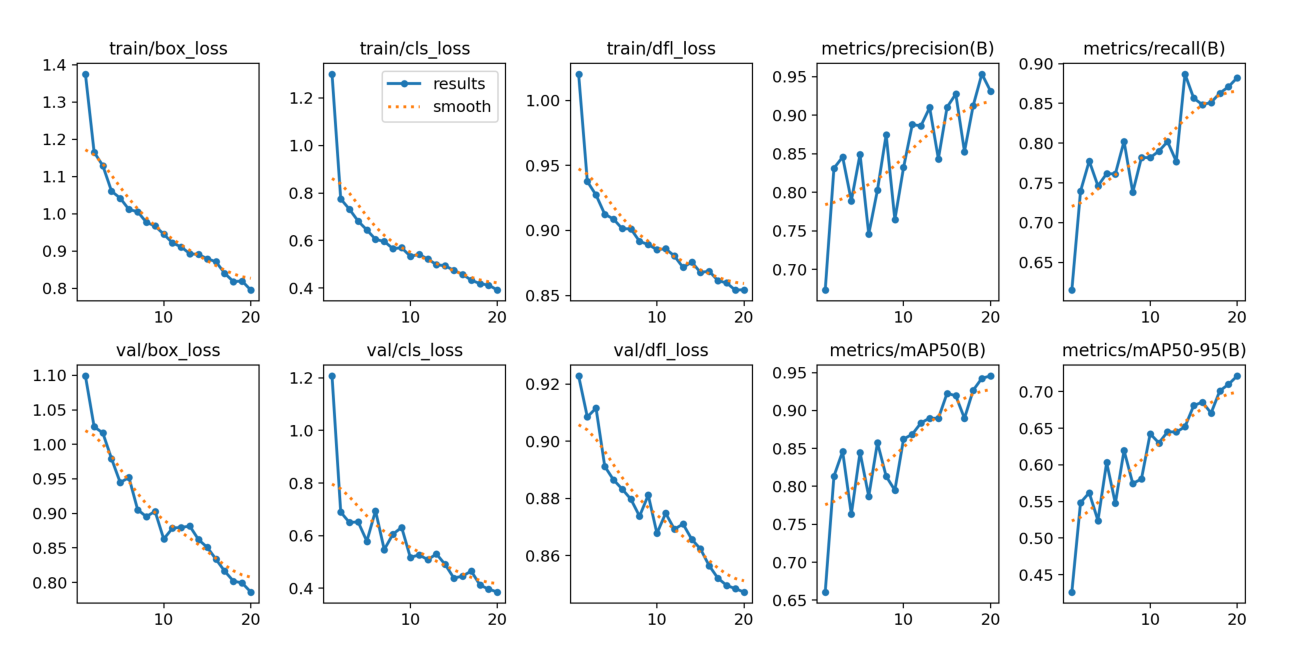

In [14]:
img = Image.open(result_metrics_path)

plt.figure(dpi=250)
plt.imshow(img)
plt.axis('off')
plt.show()

### Confusion matrix

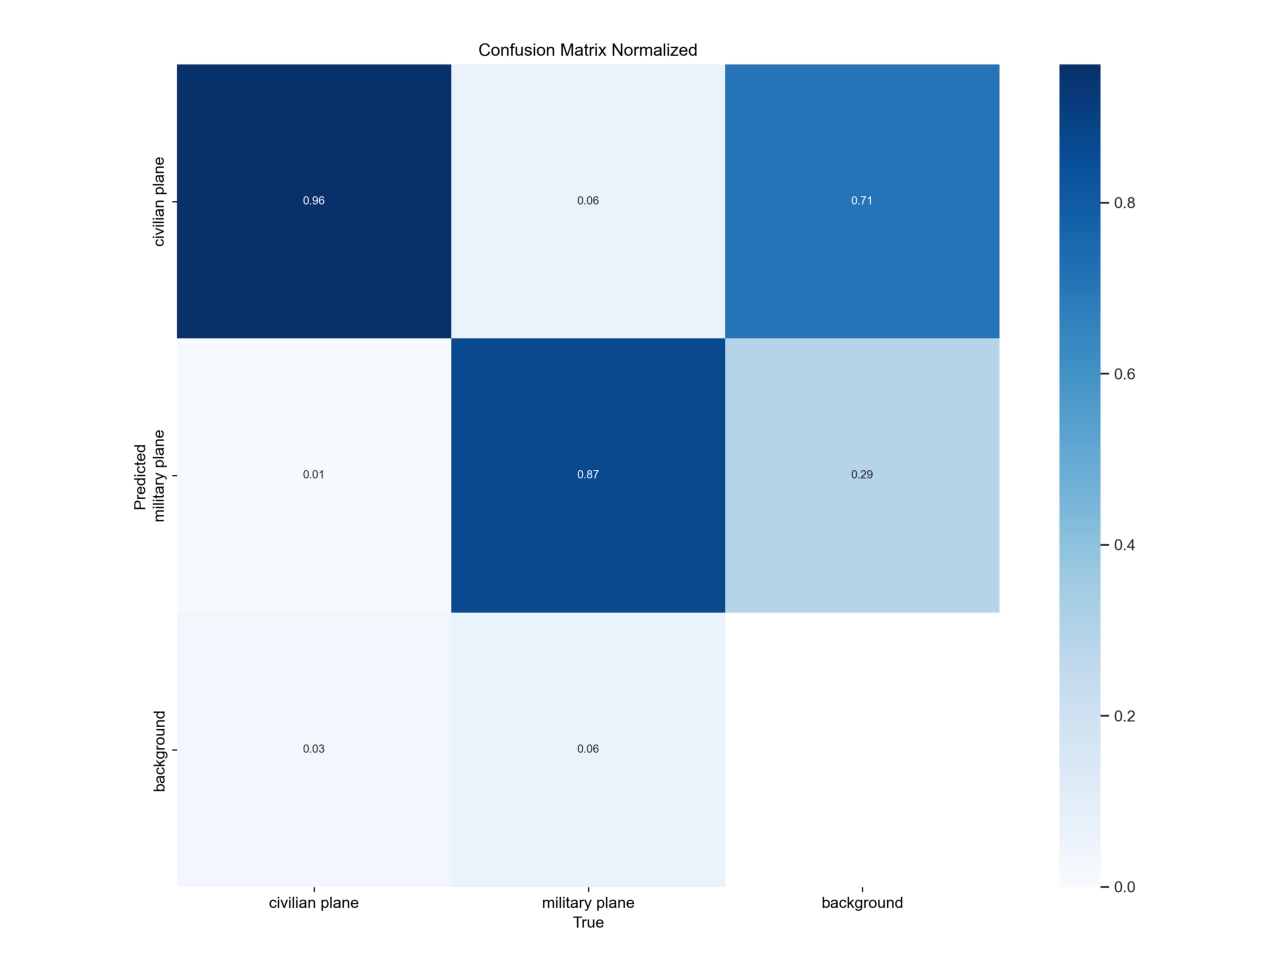

In [15]:
img = Image.open(confusion_matrix_path)

plt.figure(dpi=250)
plt.imshow(img)
plt.axis('off')
plt.show()

### Precision - accuracy of predicting a positive class

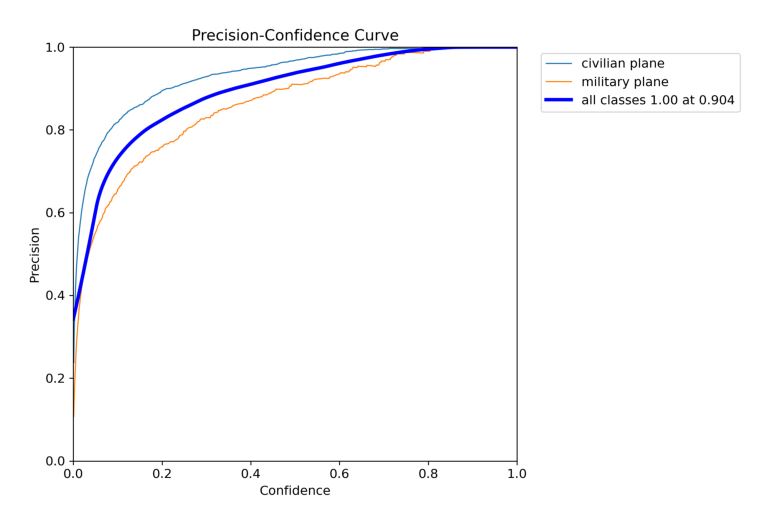

In [16]:
img = Image.open(precision_curve_path)

plt.figure(dpi=150)
plt.imshow(img)
plt.axis('off')
plt.show()

### Recall - the volume of positive instances that are correctly detected by the classifier

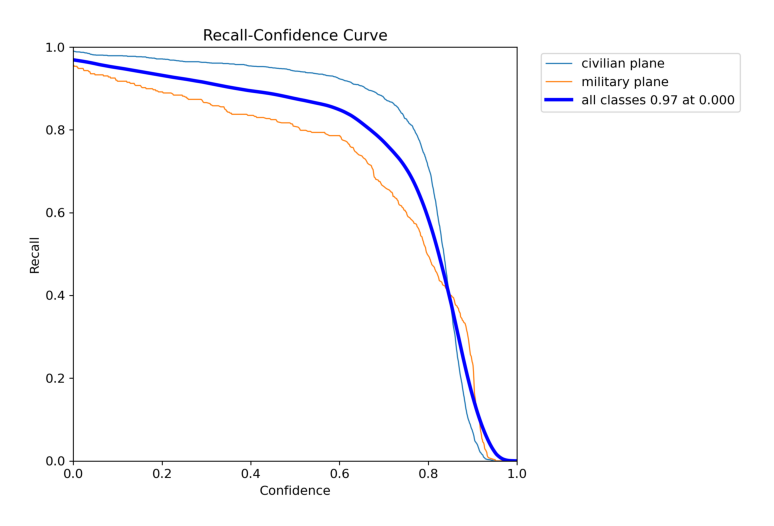

In [17]:
img = Image.open(recall_curve_path)

plt.figure(dpi=150)
plt.imshow(img)
plt.axis('off')
plt.show()

### F1 - harmonic mean of precision and recall

<span style="display: block; text-align: left;">$\displaystyle F1 = \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}}$</span>

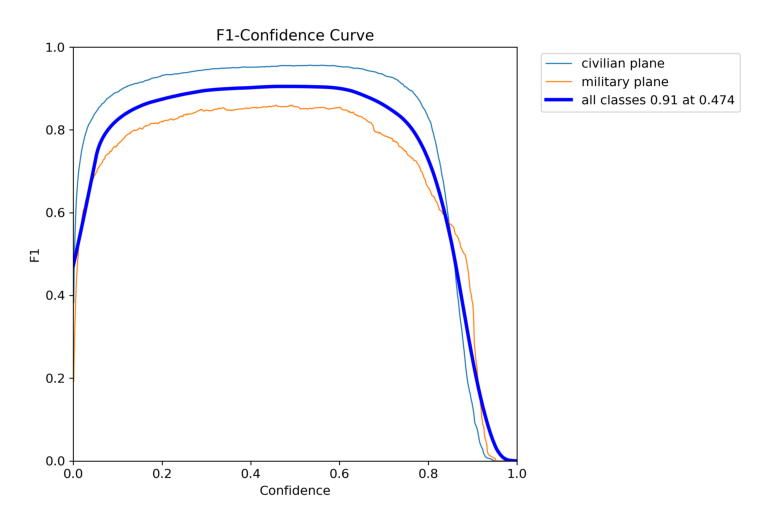

In [18]:
img = Image.open(f1_curve_path)

plt.figure(dpi=150)
plt.imshow(img)
plt.axis('off')
plt.show()

### Yolo test


image 1/1 C:\Program_code\Bachelor\data\yolo_data\images\val_data\188_DT2.jpg: 256x416 4 civilian planes, 38.1ms
Speed: 2.9ms preprocess, 38.1ms inference, 9.9ms postprocess per image at shape (1, 3, 256, 416)

image 1/1 C:\Program_code\Bachelor\data\yolo_data\images\val_data\GBG_459.jpg: 256x416 2 military planes, 34.4ms
Speed: 2.1ms preprocess, 34.4ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 416)


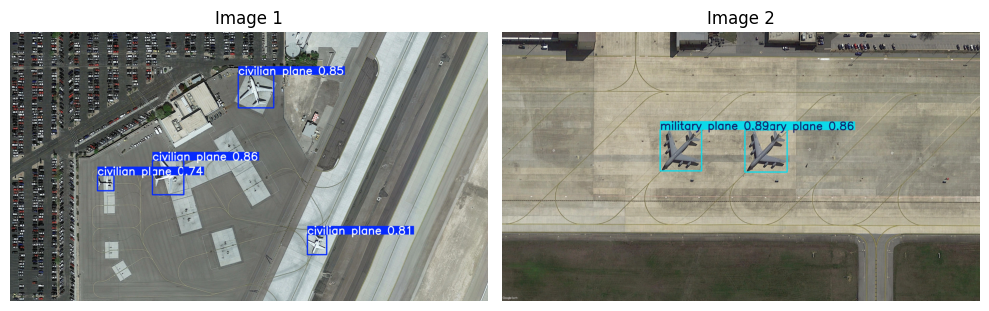

In [19]:
yolo_test_sample1_env_key = TestEnvKeys.YOLO_TEST_SAMPLE1.value
yolo_test_sample2_env_key = TestEnvKeys.YOLO_TEST_SAMPLE2.value

img_paths = [env_config[yolo_test_sample1_env_key], env_config[yolo_test_sample2_env_key]]

results = [model(p)[0] for p in img_paths]

plt.figure(figsize=(10, 10))

for i, result in enumerate(results):
    result.save(filename=f"pred_{i}.jpg")
    img = Image.open(f"pred_{i}.jpg")

    plt.subplot(1, 2, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image {i + 1}")

plt.tight_layout()
plt.show()